# CiFAR10 이미지 분류 모델 구현
---
- 데이터 : CiFAR10 (https://www.cs.toronto.edu/~kriz/cifar.html)
- 학습방법 : 분류(10가지 이미지) => 다중분류
- 이미지 : DNN, CNN 적용

In [1]:
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.datasets.cifar10 import load_data
from sklearn.model_selection import train_test_split
from keras.utils import plot_model, set_random_seed

set_random_seed(42)

# [1] 데이터 로딩

In [ ]:
# 데이터 로딩
(x_train, y_train), (x_test, y_test) = load_data()
x_train.shape, x_test.shape

 97886208/170498071 [================>.............] - ETA: 2:48

# [2] 데이터 전처리 및 학습형태로 변환

In [34]:
# 스케일링 => 픽셀 / 255.0
x_train = x_train / 255.0
x_test = x_test / 255.0

In [35]:
# conv 레이어는 이미지의 채널 정보까지 입력받아야 함
x_train = x_train.reshape(-1, 28, 28, 3)
x_test = x_test.reshape(-1, 28, 28, 3)

In [36]:
# 검증용 데이터 준비
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  stratify=y_train,
                                                  test_size=0.1,
                                                  random_state=42)
x_train.shape, x_test.shape, x_val.shape

((54000, 28, 28, 1), (10000, 28, 28, 1), (6000, 28, 28, 1))

# [3] 모델 구성 및 생성

### [3-1] 모델 구상

In [37]:
model = Sequential()

In [38]:
model.add(Conv2D(10,
                 kernel_size=3,
                 strides=(1, 1),
                 padding='same',
                 input_shape=(28, 28, 3)))
model.add(MaxPool2D()
model.add(Conv2D(10,
                 kernel_size=3,
                 strides=(1, 1),
                 padding='same'))
model.add(MaxPool2D()
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [42]:
# 모델 정보 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1960)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                19610     
                                                                 
Total params: 19,710
Trainable params: 19,710
Non-trainable params: 0
_________________________________________________________________


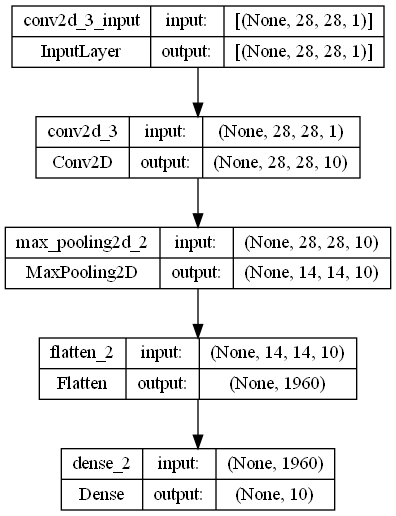

In [43]:
plot_model(model, show_dtype=False, show_shapes=True)

### [3-2] 모델 생성

In [44]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

### [3-3] 모델 학습

In [47]:
model.fit(x_train, y_train,
          epochs=5,
          validation_data=(x_val, y_val))

Epoch 1/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2562 - accuracy: 0.9086 - val_loss: 0.3061 - val_accuracy: 0.8918
Epoch 2/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2490 - accuracy: 0.9118 - val_loss: 0.2847 - val_accuracy: 0.8993
Epoch 3/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2434 - accuracy: 0.9135 - val_loss: 0.2859 - val_accuracy: 0.8998
Epoch 4/5
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2375 - accuracy: 0.9158 - val_loss: 0.2844 - val_accuracy: 0.8988
Epoch 5/5
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2331 - accuracy: 0.9174 - val_loss: 0.2925 - val_accuracy: 0.8983


# [4] 모델 평가

In [50]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.8886


[0.3175848126411438, 0.8885999917984009]

# [5] 테스트

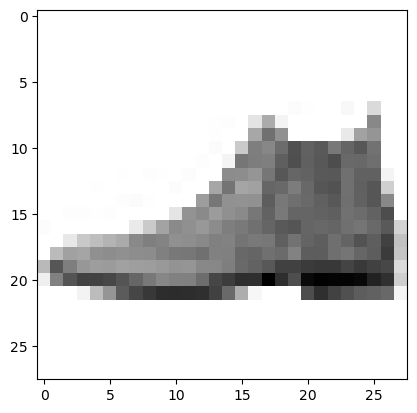

1/1 [==============================] - 0s 14ms/step


In [66]:
# plt.imshow(x_test[0], cmap='gray_r')
# plt.show()
pre = model.predict(x_test[0].reshape(-1, 28, 28, 1))

In [65]:
print(f'정답 : {y_test[0]}')
print(f'예측결과 : {pre.round(2)}')

정답 : 9
예측결과 : [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


9